In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [191]:
import torch
import math

from sent_order.models.kt_regression import SentenceEncoder, Regressor, Corpus
from sent_order.perms import sample_uniform_perms

In [8]:
sent_encoder = torch.load(
    '../../data/models/new/kt-reg/sent_encoder.68.bin',
    map_location={'cuda:0': 'cpu'},
)

In [ ]:
regressor = torch.load(
    '../../data/models/new/kt-reg/regressor.68.bin',
    map_location={'cuda:0': 'cpu'},
)

In [115]:
train = Corpus('../../data/train.json/', 10000)

100%|██████████| 10000/10000 [00:01<00:00, 9264.33it/s]


In [192]:
grafs = [g for g in train.grafs if len(g.sentences) == 5]

In [193]:
len(grafs)

1667

In [194]:
graf = grafs[200]

In [195]:
[' '.join(s.tokens) for s in graf.sentences]

['The Poincare invariant coupled - channel formalism for two - particle systems interacting via one - particle exchange , which has been developed and applied to vector mesons in Ref .',
 '[ 1 ] is applied to axial vector mesons .',
 'We thereby extend the previous study of a dynamical treatment of the Goldstone - boson exchange by comparison with the commonly used instantaneous approximation to the case of orbital angular momentum l=1 .',
 'Effects in the mass shifts show more variations than for the vector - meson case .',
 'Results for the decay widths are sizable , but comparison with sparse experimental data is inconclusive .']

In [196]:
sents = sent_encoder(graf.sentence_variables())

In [197]:
sents

Variable containing:
 5.0412e-04 -9.6422e-05 -1.1423e-03  ...   9.9398e-06  6.2932e-05  6.0085e-06
 8.7085e-03 -5.1235e-03 -4.0510e-02  ...   2.2760e-04 -2.7065e-03  7.3140e-02
-1.0033e-07 -2.7687e-06 -2.0336e-04  ...   1.1769e-05 -3.8874e-02  2.8920e-03
 5.6800e-03 -1.5396e-02 -6.7903e-03  ...   7.9880e-03 -3.4566e-04 -8.2578e-04
 1.3909e-03  1.8509e-03  1.4604e-04  ...   8.8518e-02  1.2035e-03 -1.4811e-03
[torch.FloatTensor of size 5x1000]

In [198]:
regressor(sents.unsqueeze(0))

Variable containing:
1.00000e-02 *
  2.3582
[torch.FloatTensor of size 1]

In [201]:
perms, kts = sample_uniform_perms(5, 50)

In [202]:
kt_pred = []
for perm in perms:
    perm = torch.LongTensor(perm)
    kt = regressor(sents[perm].unsqueeze(0)).data[0]
    kt_pred.append(kt)

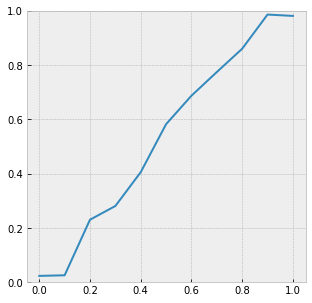

In [203]:
plt.figure(figsize=(5,5))
plt.ylim(0, 1)
plt.plot(kts, kt_pred)

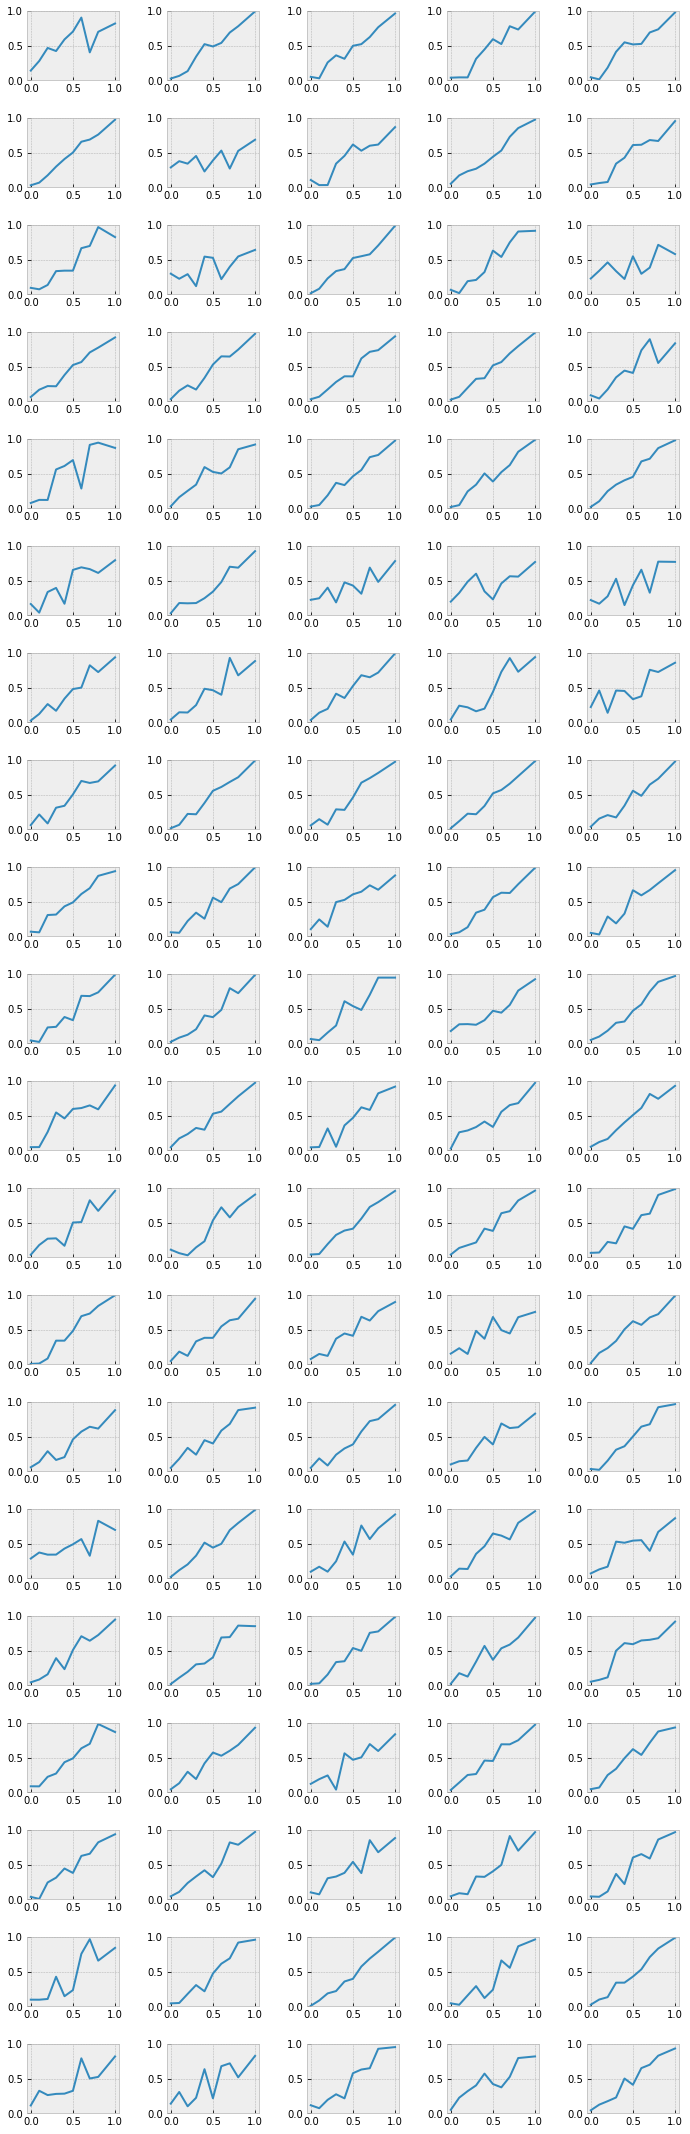

In [208]:
cols = 5

# Get row count and figure size.
rows = math.ceil(len(grafs[:100]) / cols)
figsize = (cols*2, rows*2)

# Make the figure + axes.
fig, axarr = plt.subplots(rows, cols, figsize=(cols*2, rows*1.5))
fig.tight_layout(pad=2)

for i, graf in enumerate(grafs[:100]):

    # Select the axis for the next plot.
    ax = axarr[math.floor(i/cols)][i%cols]
    
    sents = sent_encoder(graf.sentence_variables())
    
    perms, kts = sample_uniform_perms(5, 10)
    
    kt_pred = []
    for perm in perms:
        perm = torch.LongTensor(perm)
        kt = regressor(sents[perm].unsqueeze(0)).data[0]
        kt_pred.append(kt)
        
    ax.set_ylim(0, 1)
    ax.plot(kts, kt_pred)